# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Kevin Adiputra Mahesa
- **Email:** kevinadiputra66@gmail.com
- **ID Dicoding:** kevin_adiputra

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Apa kategori produk yang paling laku?
- Pertanyaan 2: Apa metode pembayaran yang paling sering digunakan?
- pertanyaan 3: Kota mana yang memiliki pelanggan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [2]:
# mengunduh dataset melalui gdrive
!gdown --id 1r-Ve7iZZpSqM0b7nHEffBZ9nsl8MI0yZ

# ekstrak dataset
zip_file_path = 'E-commerce-public-dataset.zip'

# Membuat folder untuk mengekstrak isi ZIP
extraction_folder = 'E-Commerce Public Dataset'
os.makedirs(extraction_folder, exist_ok=True)

# Mengekstrak isi ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

print(f'Isi ZIP telah diekstrak ke folder: {extraction_folder}')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1r-Ve7iZZpSqM0b7nHEffBZ9nsl8MI0yZ
From (redirected): https://drive.google.com/uc?id=1r-Ve7iZZpSqM0b7nHEffBZ9nsl8MI0yZ&confirm=t&uuid=23dd84a7-4f45-48b1-af73-1ad8aedd5260
To: /content/E-commerce-public-dataset.zip
100% 44.9M/44.9M [00:00<00:00, 45.3MB/s]
Isi ZIP telah diekstrak ke folder: E-Commerce Public Dataset


In [3]:
import pandas as pd

# Load setiap dataset
customers = pd.read_csv('/content/E-Commerce Public Dataset/E-Commerce Public Dataset/customers_dataset.csv')
geolocation = pd.read_csv('/content/E-Commerce Public Dataset/E-Commerce Public Dataset/geolocation_dataset.csv')
orders = pd.read_csv('/content/E-Commerce Public Dataset/E-Commerce Public Dataset/orders_dataset.csv')
order_items = pd.read_csv('/content/E-Commerce Public Dataset/E-Commerce Public Dataset/order_items_dataset.csv')
order_payments = pd.read_csv('/content/E-Commerce Public Dataset/E-Commerce Public Dataset/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/E-Commerce Public Dataset/E-Commerce Public Dataset/order_reviews_dataset.csv')
products = pd.read_csv('/content/E-Commerce Public Dataset/E-Commerce Public Dataset/products_dataset.csv')
category_translation = pd.read_csv('/content/E-Commerce Public Dataset/E-Commerce Public Dataset/product_category_name_translation.csv')
sellers = pd.read_csv('/content/E-Commerce Public Dataset/E-Commerce Public Dataset/sellers_dataset.csv')

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [6]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [10]:
category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [11]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- Dataset customers berisi 99.441 entri dengan informasi pelanggan seperti customer_id, customer_zip_code_prefix, customer_city, dan customer_state.
- Dataset geolocation berisi lebih dari 1 juta entri, termasuk informasi geolokasi seperti latitude dan longitude (geolocation_lat, geolocation_lng), yang bisa digunakan untuk analisis spasial, penting untuk melihat distribusi geografis pelanggan.
- Dataset order_items memberikan detail tentang setiap item yang dibeli.
- Dataset order_payments memberikan informasi tentang metode pembayaran yang digunakan pelanggan.
- Dataset order memberikan gambaran keseluruhan tentang siklus hidup sebuah pesanan, mulai dari pemesanan hingga pengiriman.
- Dataset order_reviews memberikan pemahaman mengenai tingkat kepuasan pelanggan
- Dataset category_translation membantu dalam mengategorikan produk dengan lebih baik.
- Dataset sellers memberikan informasi tentang para penjual di platform.
- Dataset products memberikan detail tentang setiap produk yang dijual.

### Assessing Data

In [13]:
# Menggabungkan order_items dengan orders berdasarkan order_id
merged_data = pd.merge(order_items, orders, on='order_id')

# Menggabungkan merged_data dengan customers berdasarkan customer_id
merged_data = pd.merge(merged_data, customers, on='customer_id')

# Menggabungkan merged_data dengan payments berdasarkan order_id
merged_data = pd.merge(merged_data, order_payments, on='order_id')

# Menggabungkan merged_data dengan products berdasarkan product_id
merged_data = pd.merge(merged_data, products, on='product_id')

# Menggabungkan merged_data dengan kategori produk berdasarkan product_category_name
merged_data = pd.merge(merged_data, category_translation, on='product_category_name', how='left')

print(merged_data.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  \
0  2017-09-19 09:45:35   58.90          13.29   
1  2017-05-03 11:05:13  239.90          19.93   
2  2018-01-18 14:48:30  199.00          17.87   
3  2018-08-15 10:10:18   12.99          

In [14]:
# melihat informasi umum tentang data
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   order_item_id                  117601 non-null  int64  
 2   product_id                     117601 non-null  object 
 3   seller_id                      117601 non-null  object 
 4   shipping_limit_date            117601 non-null  object 
 5   price                          117601 non-null  float64
 6   freight_value                  117601 non-null  float64
 7   customer_id                    117601 non-null  object 
 8   order_status                   117601 non-null  object 
 9   order_purchase_timestamp       117601 non-null  object 
 10  order_approved_at              117586 non-null  object 
 11  order_delivered_carrier_date   116356 non-null  object 
 12  order_delivered_customer_date 

In [15]:
# mengecek apakah ada nilai yang hilang
print(merged_data.isnull().sum())

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weig

In [16]:
# mengecek data yang terduplikasi
print(merged_data.duplicated().sum())

0


In [17]:
# Statistik deskriptif
print(merged_data.describe())

       order_item_id          price  freight_value  customer_zip_code_prefix  \
count  117601.000000  117601.000000  117601.000000             117601.000000   
mean        1.195900     120.824783      20.045990              35051.793097   
std         0.697706     184.479323      15.861315              29820.588877   
min         1.000000       0.850000       0.000000               1003.000000   
25%         1.000000      39.900000      13.080000              11310.000000   
50%         1.000000      74.900000      16.290000              24315.000000   
75%         1.000000     134.900000      21.190000              58600.000000   
max        21.000000    6735.000000     409.680000              99990.000000   

       payment_sequential  payment_installments  payment_value  \
count       117601.000000         117601.000000  117601.000000   
mean             1.093528              2.939482     172.686752   
std              0.726692              2.774223     267.592290   
min            

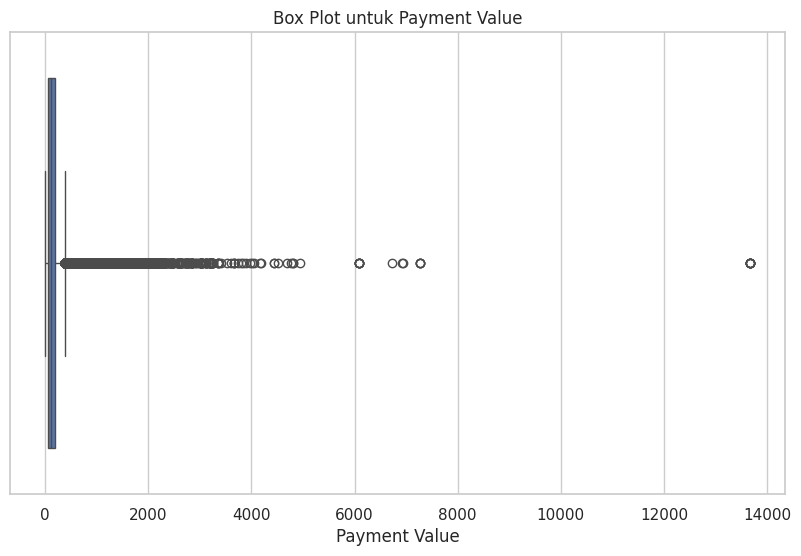

In [23]:
# melihat outlier pada payment value
sns.set(style="whitegrid")

# Membuat box plot untuk kolom payment_value
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['payment_value'])
plt.title('Box Plot untuk Payment Value')
plt.xlabel('Payment Value')
plt.show()

**Insight:**
- Terlihat ada beberapa kolom yang memiliki missing values.
- Tidak ada duplikasi data.
- Terdapat outlier pada nilai transaksi

### Cleaning Data

In [18]:
# Hapus baris dengan missing values
cleaned_data = merged_data.dropna()

# Mengatasi outlier: menghapus transaksi yang sangat jauh dari median
Q1 = cleaned_data['payment_value'].quantile(0.25)
Q3 = cleaned_data['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Filter data untuk menghilangkan outlier
cleaned_data = cleaned_data[~((cleaned_data['payment_value'] < (Q1 - 1.5 * IQR)) | (cleaned_data['payment_value'] > (Q3 + 1.5 * IQR)))]

print(cleaned_data.shape)

(104258, 31)


In [22]:
cleaned_data.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000,104258.000000
mean,1.149293,88.982786,18.496856,34683.398329,1.096952,2.726870,119.918842,48.792323,763.234447,2.203179,1785.291728,29.681473,15.810528,22.676121
std,0.530267,75.462004,11.443942,29782.869493,0.710217,2.549822,81.440729,10.052672,630.794949,1.719574,3082.225337,15.684490,12.513851,11.312178
min,1.000000,0.850000,0.000000,1003.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,38.500000,12.830000,11050.000000,1.000000,1.000000,57.510000,42.000000,341.000000,1.000000,267.000000,18.000000,8.000000,15.000000
50%,1.000000,69.000000,16.080000,24110.000000,1.000000,1.000000,99.900000,52.000000,589.000000,1.000000,633.000000,25.000000,12.000000,20.000000
75%,1.000000,119.800000,19.890000,57410.000000,1.000000,4.000000,163.580000,57.000000,953.000000,3.000000,1650.000000,37.000000,20.000000,30.000000
max,21.000000,3899.000000,232.690000,99980.000000,26.000000,24.000000,381.900000,76.000000,3988.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


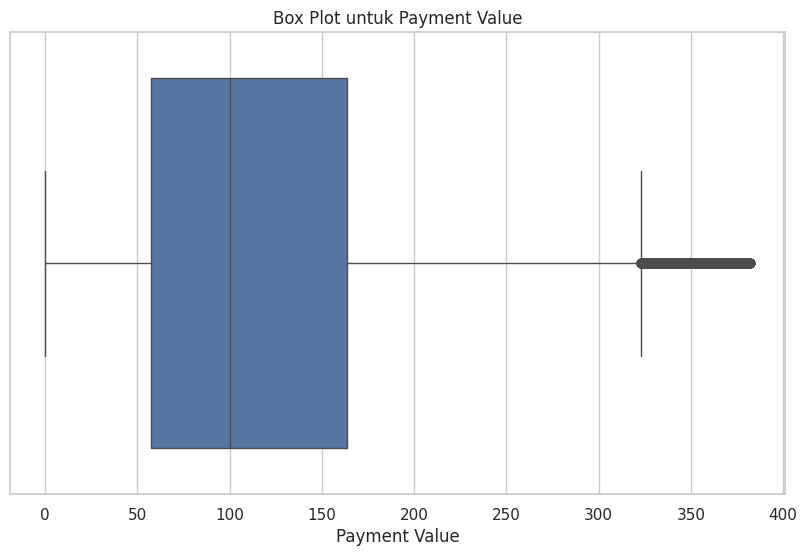

In [25]:
sns.set(style="whitegrid")

# Membuat box plot untuk kolom payment_value
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_data['payment_value'])
plt.title('Box Plot untuk Payment Value')
plt.xlabel('Payment Value')
plt.show()

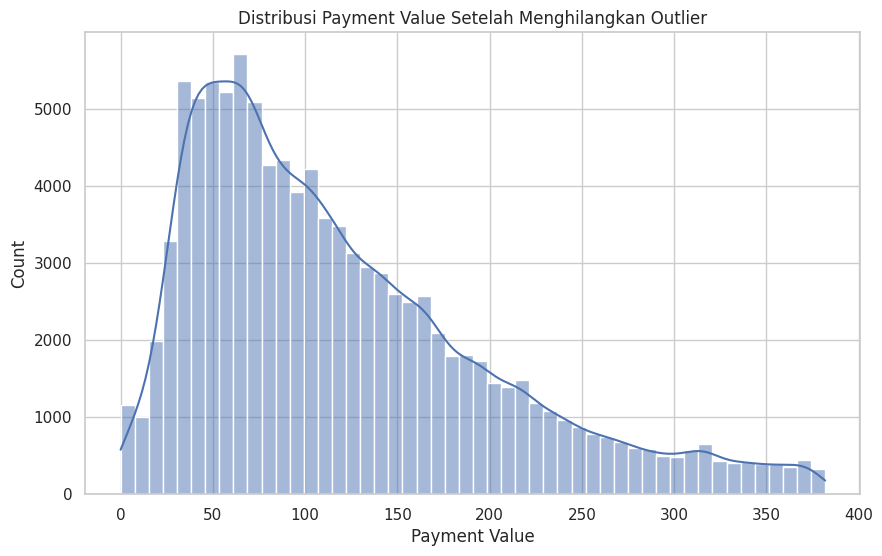

In [27]:
# melihat distribusi data nilai pembayaran setelah cleaned
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['payment_value'], bins=50, kde=True)
plt.title('Distribusi Payment Value Setelah Menghilangkan Outlier')
plt.xlabel('Payment Value')
plt.show()

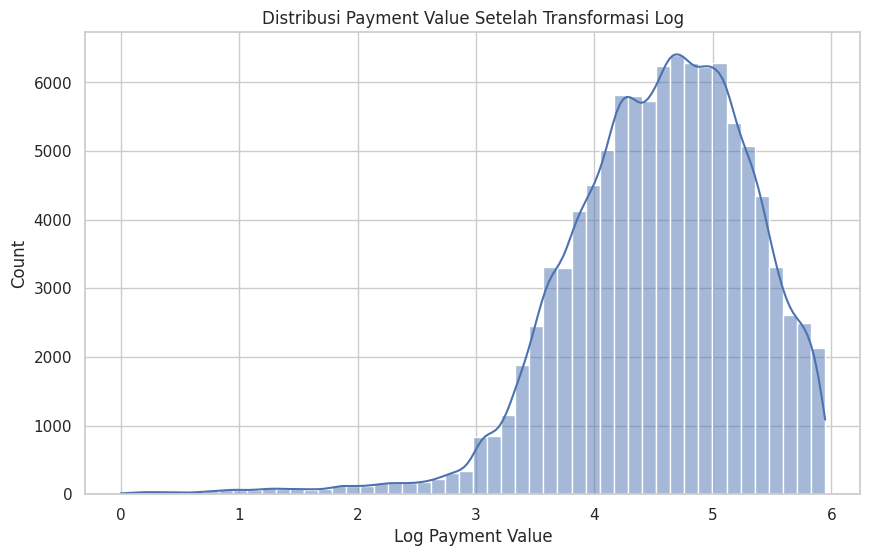

In [28]:
# Transformasi log pada payment_value
cleaned_data['log_payment_value'] = np.log1p(cleaned_data['payment_value'])

# Visualisasi distribusi setelah transformasi log
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['log_payment_value'], bins=50, kde=True)
plt.title('Distribusi Payment Value Setelah Transformasi Log')
plt.xlabel('Log Payment Value')
plt.show()

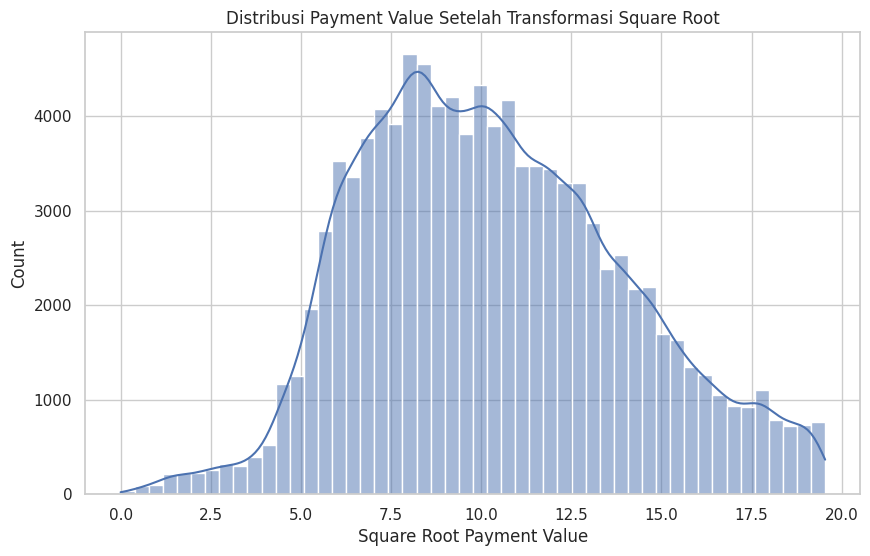

In [30]:
# menggunakan transformasi square root
cleaned_data['sqrt_payment_value'] = np.sqrt(cleaned_data['payment_value'])

# Visualisasi distribusi setelah transformasi square root
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['sqrt_payment_value'], bins=50, kde=True)
plt.title('Distribusi Payment Value Setelah Transformasi Square Root')
plt.xlabel('Square Root Payment Value')
plt.show()

**Insight:**
- Missing values sudah dihilangkan.
- Menggunakan transformasi akar kuadrat, untuk mengurangi skewed pada distribusi nilai pembayaran

In [53]:
df_cleaned = pd.DataFrame(cleaned_data)

# menyimpan data bersih ke file csv
cleaned_data_path = 'cleaned_data.csv'
df_cleaned.to_csv(cleaned_data_path, index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [49]:
# Kategori produk yang paling laku
produk_terbanyak = merged_data['product_category_name_english'].value_counts()
print(f"produk terbanyak: \n{produk_terbanyak}")

# Metode pembayaran yang paling sering digunakan
metode_pembayaran = merged_data['payment_type'].value_counts()
print(f"metode pembayaran yang paling sering digunakan: \n{metode_pembayaran}")

# Menghitung jumlah pelanggan per kota
city_customers = customers['customer_city'].value_counts().reset_index()
city_customers.columns = ['customer_city', 'num_customers']
print(f"jumlah pelanggan perkota: \n{city_customers}")

produk terbanyak: 
product_category_name_english
bed_bath_table               11823
health_beauty                 9972
sports_leisure                8945
furniture_decor               8744
computers_accessories         8082
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64
metode pembayaran yang paling sering digunakan: 
payment_type
credit_card    86769
boleto         22867
voucher         6274
debit_card      1691
Name: count, dtype: int64
jumlah pelanggan perkota: 
          customer_city  num_customers
0             sao paulo          15540
1        rio de janeiro           6882
2        belo horizonte           2773
3              brasilia           2131
4              curitiba           1521
...                 ...            ...
4114           bequimao              1
4115            a

**Insight:**
- Kategori produk terlaris adalah bed_bath_table, health_beauty, dan sports_leisure.
- Metode pembayaran credit_card adalah yang paling sering digunakan, diikuti oleh boleto dan voucher.
- Kota dengan pelanggan terbanyak adalah Sao paulo, diikuti dengan rio de janeiro dan belo horizonte

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa kategori produk yang paling laku?

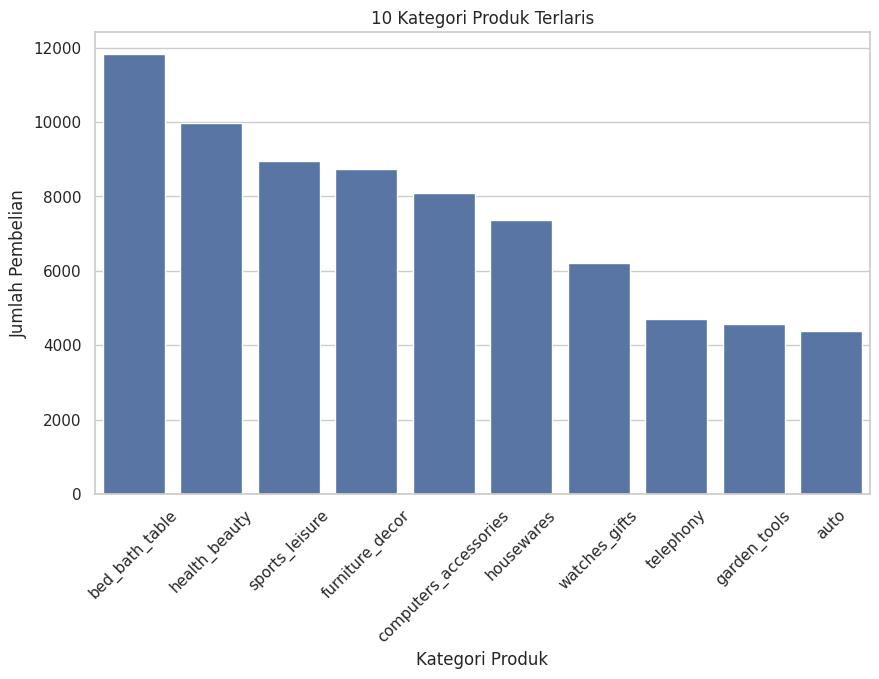

In [42]:
# Kategori produk yang paling laku
plt.figure(figsize=(10, 6))
sns.barplot(x=produk_terbanyak.index[:10], y=produk_terbanyak.values[:10])
plt.title('10 Kategori Produk Terlaris')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Apa metode pembayaran yang paling sering digunakan?

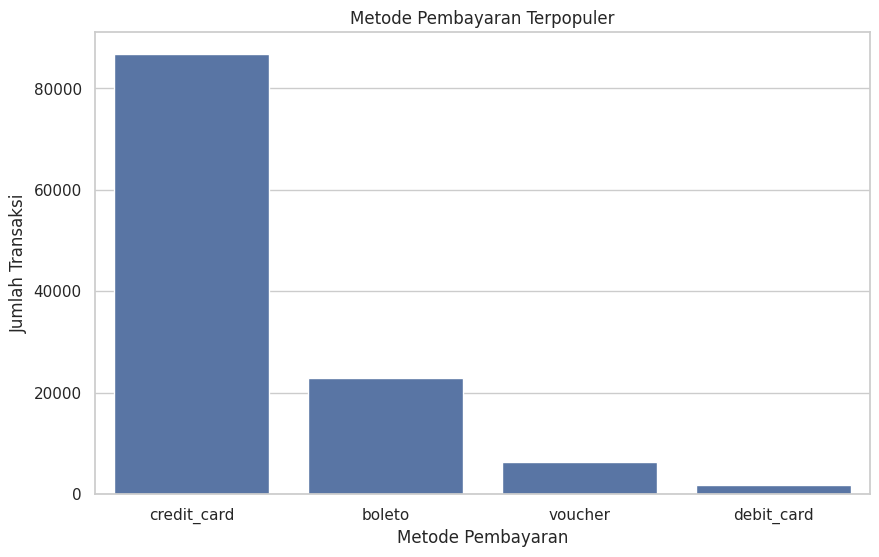

In [43]:
# Metode Pembayaran yang Paling Sering Digunakan
plt.figure(figsize=(10, 6))
sns.barplot(x=metode_pembayaran.index, y=metode_pembayaran.values)
plt.title('Metode Pembayaran Terpopuler')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.show()

### pertanyaan 3: Kota mana yang memiliki pelanggan terbanyak?

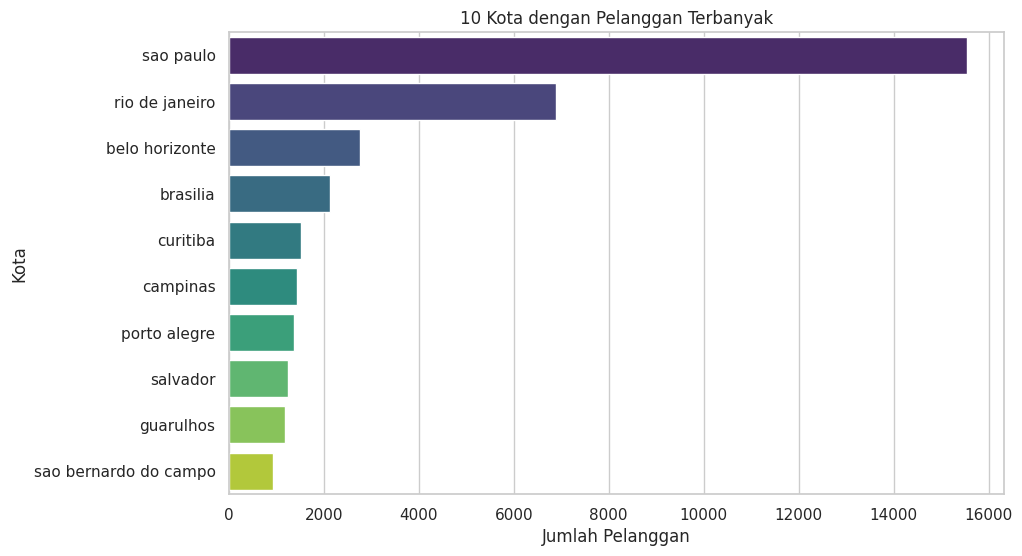

In [45]:
# 10 kota dengan jumlah pelanggan terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(x='num_customers', y='customer_city', data=city_customers.head(10), palette='viridis')
plt.title('10 Kota dengan Pelanggan Terbanyak')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.show()

**Insight:**
- Kategori seperti bed_bath_table dan health_beauty adalah yang paling diminati oleh konsumen, menunjukkan bahwa produk terkait rumah dan kesehatan memiliki pangsa pasar yang besar.
- Sebagian besar konsumen memilih kartu kredit sebagai metode pembayaran utama, yang mungkin menunjukkan kepercayaan konsumen terhadap pembayaran online.
- kota dengan jumlah pelanggan terbanyak adalah Sao paulo, diikuti dengan rio de janeiro dan belo horizonte itu artinya tempat tersebut adalah tempat strategis yang memiliki potensi pasar terbesar. Kota dengan pelanggan terbanyak dapat menjadi fokus utama dalam strategi pengiriman dan pemasaran, karena mereka menunjukkan permintaan tinggi.

## Analisis Lanjutan (Opsional)

In [51]:
# Hitung Recency, Frequency, Monetary untuk RFM Analysis
import datetime as dt

# Konversi kolom 'order_purchase_timestamp' ke format datetime
cleaned_data['order_purchase_timestamp'] = pd.to_datetime(cleaned_data['order_purchase_timestamp'])

# Tentukan hari terakhir transaksi
snapshot_date = cleaned_data['order_purchase_timestamp'].max() + dt.timedelta(days=1)

# Hitung Recency
rfm = cleaned_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
})

rfm

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...
fffb09418989a0dbff854a28163e47c6,255,1,73.16
fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
ffff371b4d645b6ecea244b27531430a,568,1,112.46


Pelanggan dapat dikelompokkan berdasarkan Recency, Frequency, dan Monetary untuk membantu strategi pemasaran seperti memberikan diskon kepada pelanggan dengan recency tinggi atau meningkatkan engagement untuk pelanggan dengan frequency rendah.

## Conclusion

### Kesimpulan Analisis Data E-commerce

**Kesimpulan Pertanyaan 1:**
Analisis menunjukkan bahwa sepuluh kategori produk terlaris adalah:
1. Bed Bath Table: 9417 order
2. Health & Beauty: 8836 order
3. Sports & Leisure: 7720 order
4. Computers & Accessories: 6689 order
5. Furniture & Decor: 6449 order
6. Housewares: 5884 order
7. Watches & Gifts: 5624 order
8. Telephony: 4199 order
9. Auto: 3897 order
10. Toys: 3886 order

*Analisis:* Kategori produk yang paling banyak terjual menunjukkan minat dan kebutuhan pelanggan dalam sektor tertentu. Kategori seperti Bed Bath Table dan Health & Beauty yang mendominasi pasar dapat menjadi fokus utama dalam strategi pemasaran. Penjual dapat mempertimbangkan untuk menawarkan promosi atau bundling produk dalam kategori ini untuk meningkatkan penjualan.

---

**Kesimpulan Pertanyaan 2:**
Metode pembayaran yang paling sering digunakan adalah:
- Kartu Kredit: 86769 transaksi
- Boleto: 22867 transaksi
- Voucher: 6274 transaksi
- Kartu Debit: 1691 transaksi

*Analisis:* Penggunaan kartu kredit yang dominan sebagai metode pembayaran menunjukkan kepercayaan pelanggan terhadap transaksi online. Penjual harus memastikan bahwa proses pembayaran aman dan nyaman. Selain itu, menawarkan lebih banyak opsi pembayaran seperti Boleto dapat menarik segmen pelanggan yang lebih luas, terutama yang lebih memilih metode non-kartu. Memperhatikan preferensi metode pembayaran pelanggan dapat meningkatkan konversi dan kepuasan pengguna.

---

**Kesimpulan Pertanyaan 3:**

Dari analisis, sepuluh kota dengan jumlah pelanggan terbanyak adalah:
1. São Paulo: 15540 pelanggan
2. Rio de Janeiro: 6882 pelanggan
3. Belo Horizonte: 2773 pelanggan
4. Brasília: 2131 pelanggan
5. Curitiba: 1521 pelanggan
6. Campinas: 1444 pelanggan
7. Porto Alegre: 1379 pelanggan
8. Salvador: 1245 pelanggan
9. Guarulhos: 1189 pelanggan
10. São Bernardo do Campo: 938 pelanggan

*Analisis:* Sebagian besar pelanggan berasal dari kota besar seperti São Paulo dan Rio de Janeiro. Ini menunjukkan potensi pasar yang besar di kota-kota ini. Oleh karena itu, pengoptimalan strategi logistik untuk pengiriman yang cepat dan efisien di daerah ini dapat meningkatkan kepuasan pelanggan dan mendukung pertumbuhan penjualan. Penjual juga dapat merancang kampanye pemasaran lokal untuk menarik lebih banyak pelanggan di kota-kota tersebut.